BOAZ 15기를 위한 CNN 실습&과제 코드입니다.  
모두들 화이팅하세요! :D  
(로컬에서 실행할 경우 tensorflow 2.0 이상 환경을 권장합니다)  
-다현-

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Library Import

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, ReLU, LeakyReLU, Dropout, Activation, MaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K 
from tensorflow.keras.datasets import cifar10
tf.get_logger().setLevel("ERROR")
import os
base_path = "/content/gdrive/My Drive/보아즈/"

In [3]:
# class 개수 지정
NUM_CLASSES = 10

In [4]:
# CIFAR-10 dataset load
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

- **Assignment 1: X_train, X_test, y_train, y_test의 shape과 형식을 출력해보세요. (각각 출력해도 됩니다!)**

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [6]:
# 기본적으로 image data는 pixel channel마다 0~255 integer로 구성되는데,
# 신경망은 input이 -1~1 범위에서 가장 잘 동작하기 때문에 데이터를 255로 나눈다.
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [7]:
# image의 integer label을 one-hot encoding vector로 바꾼다.
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

- **Assignment 2: 변환된 y_train, y_test의 shape을 출력해보세요.**

In [8]:
## 여기에!
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


- **Assignment 3: X_train에서, index 54의 이미지에서 (12,13) 위치에 해당하는 픽셀의 초록 채널(1) 값을 출력해보세요. (힌트: X_train[?,?,?,?])**

In [9]:
## 여기에!
print(X_train[54,12,13,1])

0.36862746


## Modeling

Keras에서 신경망 구조를 정의하는 방법은 **Sequential 모델**과 **함수형 API** 두 가지가 있습니다.  

Sequential 모델은 일렬로 층을 쌓은 네트워크를 빠르게 만들 때 사용하기 좋습니다. 즉 어떤 분기가 없이 이전 층이 그대로 다음 층으로 연결됩니다.  
하지만 한 층의 출력이 여러 개의 별도의 층으로 전달되거나, 한 층이 여러 층으로부터 입력을 받는 등의 가지가 있는 네트워크를 만들기 위해서는 유연성이 많은 함수형 API를 사용하는 것이 좋습니다.  
Keras에서도 단순한 모델을 만들더라도 Sequential 모델보다 함수형 API를 권장합니다. 장기적으로 보면 모델이 점점 복잡한 구조가 될 수 있기 때문입니다.  
함수형 API는 Deep Neural Network 구조를 설계하는 데에 있어 엄청난 자유를 제공합니다.

따라서 본 assignment에서는 함수형 API를 사용하여 Modeling을 진행하였습니다.

In [10]:
input_layer = Input(shape=(32,32,3))


x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)


model = Model(input_layer, output_layer)

In [11]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)       

## Train

In [12]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0005), metrics=['accuracy'])

- **Assignment 4: loss를 categorical_crossentropy로 설정한 이유는 무엇일까요?**
- 답: 10개의 범주를 가진 다중클래스 분류 문제이기 때문

In [13]:
BATCH_SIZE = 32
EPOCHS = 10

In [14]:
model.fit(X_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          shuffle=True,
          validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4714 - accuracy: 0.4745 - val_loss: 1.1939 - val_accuracy: 0.5848
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1118 - accuracy: 0.6124 - val_loss: 1.0157 - val_accuracy: 0.6436
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9670 - accuracy: 0.6625 - val_loss: 0.9870 - val_accuracy: 0.6542
Epoch 4/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.8811 - accuracy: 0.6924 - val_loss: 0.9746 - val_accuracy: 0.6599
Epoch 5/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.8230 - accuracy: 0.7121 - val_loss: 0.9282 - val_accuracy: 0.6833
Epoch 6/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7625 - accuracy: 0.7334 - val_loss: 0.9964 - val_accuracy: 0.6634
Epoch 7/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7166 - accuracy: 0.7497 - val_loss: 1.0845 - val_

In [15]:
model.layers[6].get_weights()

[array([[[[-0.00670879,  0.0356077 , -0.05855726, ...,  0.00711349,
           -0.06262704,  0.05209792],
          [ 0.05533109,  0.06693409, -0.01331225, ...,  0.06789324,
            0.05928949,  0.06339125],
          [-0.02533138, -0.01555497,  0.01113903, ..., -0.03698318,
            0.09385403,  0.09335817],
          ...,
          [ 0.06448547, -0.07975984, -0.00678959, ...,  0.1696146 ,
            0.03444421, -0.04487485],
          [ 0.04974082,  0.0624945 , -0.12406934, ..., -0.04219652,
            0.03711565,  0.03151469],
          [-0.02129413,  0.04363169,  0.18006803, ...,  0.08161932,
           -0.0467256 , -0.05331526]],
 
         [[-0.08148877,  0.0743217 , -0.07356383, ...,  0.00427431,
           -0.06887518,  0.04900089],
          [ 0.13621974, -0.07368574, -0.06806887, ..., -0.05955601,
           -0.0127057 , -0.00761209],
          [ 0.0323068 , -0.00398237,  0.02747515, ...,  0.02835224,
            0.05461674, -0.09910596],
          ...,
          [ 0

## Evaluate

In [16]:
model.evaluate(X_test, y_test, batch_size=1000)

10/10 [==============================] - 0s 48ms/step - loss: 0.9465 - accuracy: 0.6969


[0.9465029239654541, 0.6969000101089478]

[loss, accuracy] 가 출력된다.  
결과를 시각화해 보자.

In [17]:
CLASSES = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

preds = model.predict(X_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

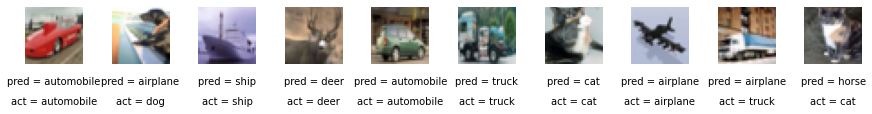

In [18]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

**- Assignment 5: model및 training 환경을 자유롭게 변경하여 Accuracy 75% 이상을 달성해 보세요!**

In [19]:
## 화이팅:)

In [20]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
NUM_CLASSES = 10
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

#### *vgg model 사용



In [21]:
## vgg model
input_layer = Input(shape=(32,32,3))

#block 1 : 32*32*64
x = Conv2D(64,(3,3), padding='same')(input_layer)
x = ReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Conv2D(64,(3,3), padding='same')(x)
x = ReLU()(x)
x = BatchNormalization()(x)

x = MaxPooling2D(2,2)(x)

x = Conv2D(128,(3,3),padding='same')(x)
x = ReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Conv2D(128,(3,3),padding='same')(x)
x = ReLU()(x)
x = BatchNormalization()(x)

x = MaxPooling2D(2,2)(x)

x = Conv2D(256,(3,3),padding='same')(x)
x = ReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Conv2D(256,(3,3),padding='same')(x)
x = ReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Conv2D(256,(3,3),padding='same')(x)
x = ReLU()(x)
x = BatchNormalization()(x)

x = MaxPooling2D(2,2)(x)

x = Conv2D(512,(3,3),padding='same')(x)
x = ReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Conv2D(512,(3,3),padding='same')(x)
x = ReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Conv2D(512,(3,3),padding='same')(x)
x = ReLU()(x)
x = BatchNormalization()(x)

x = MaxPooling2D(2,2)(x)

x = Conv2D(512,(3,3),padding='same')(x)
x = ReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Conv2D(512,(3,3),padding='same')(x)
x = ReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Conv2D(512,(3,3),padding='same')(x)
x = ReLU()(x)
x = BatchNormalization()(x)

x = MaxPooling2D(2,2)(x)
x = Dropout(0.5)(x)

x = Flatten()(x)
x = Dense(512)(x)
x = ReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer,output_layer)

In [22]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
re_lu (ReLU)                 (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32, 32, 64)       

In [23]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.005),metrics =['accuracy'])

#### *image augmentation


In [24]:
from keras.preprocessing.image import ImageDataGenerator

TrainGenerator = ImageDataGenerator(rotation_range=15, # 회전                                                                   
                                    width_shift_range=0.1, # 좌우 이동
                                    height_shift_range=0.1, # 상하 이동
                                    fill_mode="nearest", # interpolation method -> "constant", "nearest", "reflect", "wrap"
                                    horizontal_flip=True, # 상하 뒤집기
                                    vertical_flip=False, # 좌우 뒤집기
                                    validation_split=0.2,
                                    data_format="channels_last")
TrainGenerator.fit(X_train)

In [26]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

modelsaver = ModelCheckpoint(base_path +"cifar10_basic_vgg.h5",
                             monitor = 'val_accuracy',
                             mode = 'max',
                             verbose=1,
                             save_best_only=True)

lr_scheduler = ReduceLROnPlateau(monitor="val_loss",
                                 factor=0.5, 
                                 patience=3, 
                                 verbose=1,
                                 min_delta=1e-4, 
                                 min_lr=1e-4) 

In [27]:
BATCH_SIZE = 128
EPOCHS = 40

model.fit_generator(TrainGenerator.flow(X_train,y_train,batch_size=BATCH_SIZE),
          steps_per_epoch = X_train.shape[0] // BATCH_SIZE,
          epochs=EPOCHS,
          shuffle=True,
          validation_data=(X_test, y_test),
          callbacks = [modelsaver,lr_scheduler])

Epoch 1/40
390/390 [==============================] - ETA: 0s - loss: 2.2270 - accuracy: 0.2152
Epoch 00001: val_accuracy improved from -inf to 0.15990, saving model to /content/gdrive/My Drive/보아즈/cifar10_basic_vgg.h5
390/390 [==============================] - 60s 154ms/step - loss: 2.2270 - accuracy: 0.2152 - val_loss: 3.1105 - val_accuracy: 0.1599
Epoch 2/40
390/390 [==============================] - ETA: 0s - loss: 1.9121 - accuracy: 0.3176
Epoch 00002: val_accuracy improved from 0.15990 to 0.34690, saving model to /content/gdrive/My Drive/보아즈/cifar10_basic_vgg.h5
390/390 [==============================] - 58s 148ms/step - loss: 1.9121 - accuracy: 0.3176 - val_loss: 1.7902 - val_accuracy: 0.3469
Epoch 3/40
390/390 [==============================] - ETA: 0s - loss: 1.6142 - accuracy: 0.4124
Epoch 00003: val_accuracy did not improve from 0.34690
390/390 [==============================] - 58s 148ms/step - loss: 1.6142 - accuracy: 0.4124 - val_loss: 2.0496 - val_accuracy: 0.3464
Epoch 

In [31]:
best_model = load_model(base_path + "cifar10_basic_vgg.h5")
best_model.evaluate(X_test,y_test,batch_size = 1000)

10/10 [==============================] - 2s 220ms/step - loss: 0.3368 - accuracy: 0.8939


[0.3367859721183777, 0.8938999772071838]